In [2]:
import numpy as np
import pandas as pd
import sys 
import os
import nibabel as nib
import matplotlib.pyplot as plt
import glob 

In [3]:
Train_Labeled = "/home/dang.cpm/__MY_SPACE__/MICCAI/Dataset/Train_Labeled"
Train_Unlabeled = "/home/dang.cpm/__MY_SPACE__/MICCAI/Dataset/Train_Unlabeled"
Validation = "/home/dang.cpm/__MY_SPACE__/MICCAI/Dataset/Validation"

In [12]:
images = glob.glob(os.path.join(Train_Labeled, "Images", "*.nii.gz"))
masks = glob.glob(os.path.join(Train_Labeled, "Masks", "*.nii.gz"))
img = nib.load(images[20])
mask = nib.load(masks[15])

data = img.get_fdata() # Get the image data as a numpy array / Image data 
data_mask = mask.get_fdata() # Image data mask 

print(data.shape)
print(data_mask.shape)

(640, 640, 400)
(768, 768, 576)


**Image**

Dimensions: (640, 640, 400)
Voxel sizes: (np.float32(0.25), np.float32(0.25), np.float32(0.25))
Data type: int16
Affine matrix:
 [[-0.25  0.    0.   -0.  ]
 [ 0.   -0.25  0.   -0.  ]
 [ 0.    0.    0.25  0.  ]
 [ 0.    0.    0.    1.  ]]


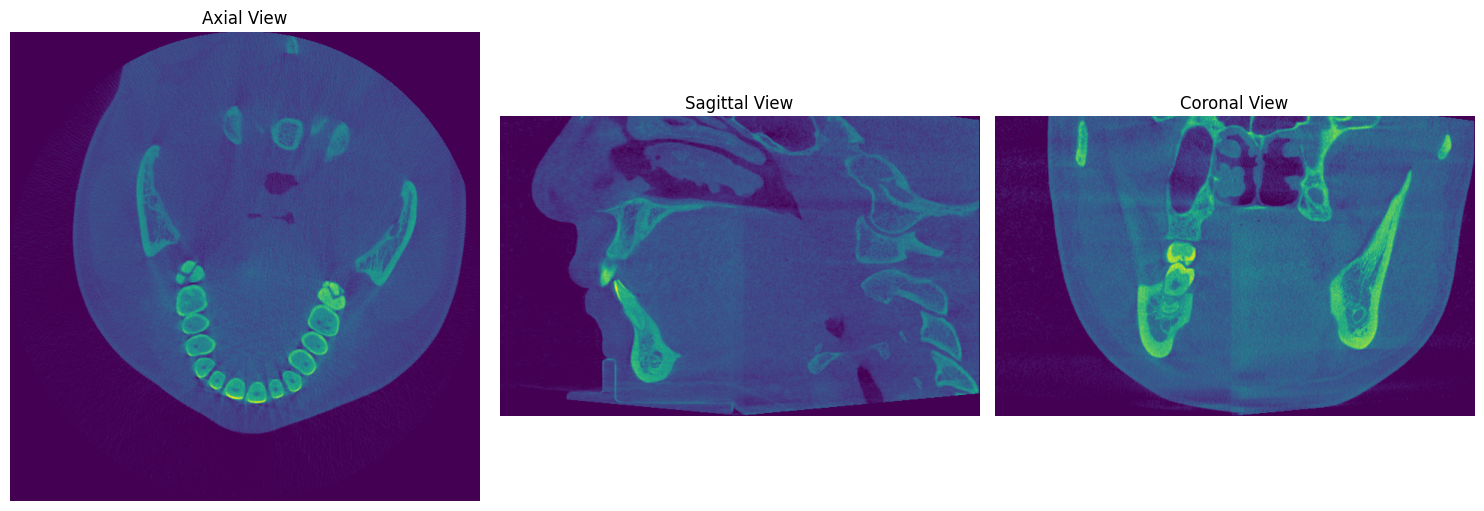

In [11]:
header = img.header
# Print the full header
# print(header)

# Extract specific metadata
print("Dimensions:", header.get_data_shape())  # Shape of the data
print("Voxel sizes:", header.get_zooms())       # Physical size of voxels (e.g., mm)
print("Data type:", header.get_data_dtype())    # Original data type
print("Affine matrix:\n", img.affine)           # Spatial transformation matrix

# Create a figure with three subplots for axial, sagittal, and coronal views
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial view (x-y plane, slicing along z-axis)
axial_slice = data[:, :, data.shape[2] // 2]  # Middle slice along z
axes[0].imshow(axial_slice.T, cmap='viridis', origin='lower')
axes[0].set_title('Axial View')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].axis('off')

# Sagittal view (y-z plane, slicing along x-axis)
sagittal_slice = data[data.shape[0] // 2, :, :]  # Middle slice along x
axes[1].imshow(sagittal_slice.T, cmap='viridis', origin='lower')
axes[1].set_title('Sagittal View')
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
axes[1].axis('off')

# Coronal view (x-z plane, slicing along y-axis)
coronal_slice = data[:, data.shape[1] // 2, :]  # Middle slice along y
axes[2].imshow(coronal_slice.T, cmap='viridis', origin='lower')
axes[2].set_title('Coronal View')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Z')
axes[2].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

**Mask**

Dimensions: (768, 768, 576)
Voxel sizes: (np.float32(0.3), np.float32(0.3), np.float32(0.29999924))
Data type: uint16
Affine matrix:
 [[-0.25  0.    0.   -0.  ]
 [ 0.   -0.25  0.   -0.  ]
 [ 0.    0.    0.25  0.  ]
 [ 0.    0.    0.    1.  ]]


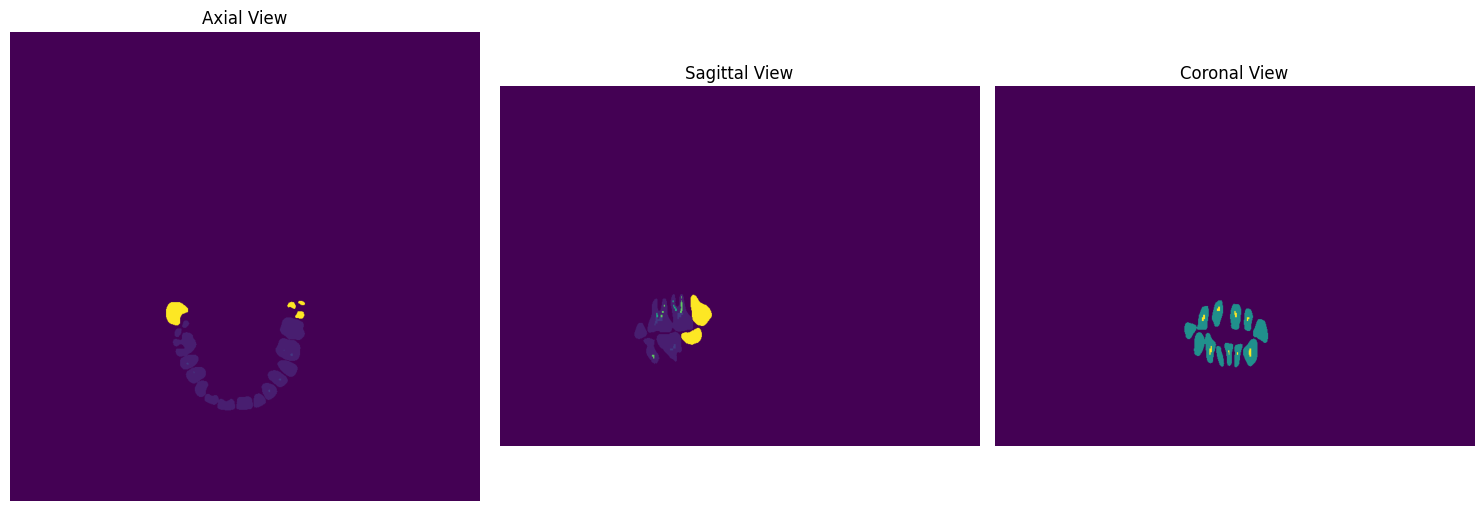

In [ ]:
header_mask = mask.header 

print("Dimensions:", header_mask.get_data_shape())  # Shape of the data
print("Voxel sizes:", header_mask.get_zooms())       # Physical size of voxels (e.g., mm)
print("Data type:", header_mask.get_data_dtype())    # Original data type
print("Affine matrix:\n", img.affine)           # Spatial transformation matrix

# Create a figure with three subplots for axial, sagittal, and coronal views
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial view (x-y plane, slicing along z-axis)
axial_slice = data_mask[:, :, np.argmax([np.sum(data_mask[:, :, i] > 0) for i in range(data_mask.shape[2])])]  # Middle slice along z
axes[0].imshow(axial_slice.T, cmap='viridis', origin='lower')
axes[0].set_title('Axial View')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].axis('off')

# Sagittal view (y-z plane, slicing along x-axis)
sagittal_slice = data_mask[np.argmax([np.sum(data_mask[i, :, :] > 0) for i in range(data_mask.shape[2])]), :, :]  # Middle slice along x
axes[1].imshow(sagittal_slice.T, cmap='viridis', origin='lower')
axes[1].set_title('Sagittal View')
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
axes[1].axis('off')

# Coronal view (x-z plane, slicing along y-axis)
coronal_slice = data_mask[:, np.argmax([np.sum(data_mask[:, i, :] > 0) for i in range(data_mask.shape[2])]), :]  # Middle slice along y
axes[2].imshow(coronal_slice.T, cmap='viridis', origin='lower')
axes[2].set_title('Coronal View')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Z')
axes[2].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [19]:
non_zero_counts = [np.sum(data_mask[i, :, :] > 0) for i in range(data_mask.shape[2])]
slice_idx = np.argmax(non_zero_counts)  # Slice with the most non-zero voxels
print(f"Slice with most non-zero voxels: {slice_idx}")
print(f"Non-zero voxel count in slice {slice_idx}: {non_zero_counts[slice_idx]}")

Slice with most non-zero voxels: 282
Non-zero voxel count in slice 282: 6724


In [9]:
unique_values, counts = np.unique(data_mask, return_counts=True)
print("Unique values and counts:", dict(zip(unique_values, counts)))

Unique values and counts: {np.float64(0.0): np.int64(338949714), np.float64(1.0): np.int64(629061), np.float64(2.0): np.int64(34929), np.float64(4.0): np.int64(2428), np.float64(5.0): np.int64(918), np.float64(6.0): np.int64(1479), np.float64(7.0): np.int64(970), np.float64(8.0): np.int64(381), np.float64(9.0): np.int64(911), np.float64(12.0): np.int64(117833)}
